# Doğrusal Regresyon Egzersizleri

50 adet Startup'ın araştırma ve geliştirmeye yönelik harcaması, yönetime yönelik harcaması, pazarlama harcaması, kazandıkları kar miktarı ve kuruldukları lokasyon bilgisi bulunmaktadır. Amaç kar miktarını tahmin etmektir. Bu bir sayısal tahmin problemidir ve bağımlı değişkenimiz "Profit".

Kütüphaneleri çekirdeğe dahil edelim.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB

Dizinde bulunan veri çerçevemizi startups değişkenine atayalım. Startups değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
startups = pd.read_csv("../input/50_Startups.csv")
df=startups.copy()

İlk 5 gözlemini yazdıralım.

In [3]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Veri çerçevesinin bilgilerini görüntüleyelim.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
R&D Spend          50 non-null float64
Administration     50 non-null float64
Marketing Spend    50 non-null float64
State              50 non-null object
Profit             50 non-null float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


Kaç gözlem ve öznitelikten oluştuğunu görüntüleyelim.

In [5]:
df.shape

(50, 5)

Eksik verileri kontrol edelim.

In [6]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

Hiç eksik veri görünmemektedir.

Veri setimizin isimlendirmelerini uygun hale getirelim.

In [7]:
df = df.rename(columns = {"R&D Spend":"RdSpend","Marketing Spend":"MarketingSpend"})

In [8]:
df.head()

,RdSpend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Korelasyon matrisi çizdirelim.

In [9]:
corr = df.corr()
corr

,RdSpend,Administration,MarketingSpend,Profit
RdSpend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
MarketingSpend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Seaborn ile korelasyon matrisinin ısı haritasını çizdirelim.

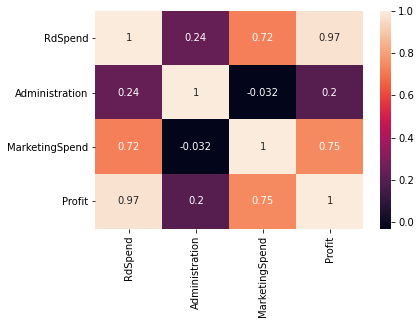

In [10]:
sns.heatmap(corr,annot=True)

Isı haritasını incelediğimizde 'Profit'-'RdSpend' arasında güçlü ve pozitif bir ilişki olduğunu görebiliriz.

R&D Spend ve Profit arasındaki korelasyonu daha iyi görebilmek için scatterplot çizdirelim.

In [11]:
fig = px.scatter(df, x="RdSpend", y="Profit",color="RdSpend")

fig.update_layout(
    title={
        'text': "RdSpend-Profit Scatter Plot",
        'y':0.95,
        'x':0.5
})

fig.show()

In [12]:
fig = px.scatter(df, x="RdSpend", y="Profit", trendline="ols",color="RdSpend")

fig.update_layout(
    title={
        'text': "RdSpend-Profit Regression Plot",
        'y':0.95,
        'x':0.5
})

fig.show()

Sayısal değişkenlerin dağılımını görmek için df üzerinden histogram çizdirelim.

In [13]:
df[df.Profit<=40000]

,RdSpend,Administration,MarketingSpend,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [14]:
trace1 = go.Histogram(
    x=df.Administration,
    opacity=0.75,
    name = "Administration",
    marker=dict(color='rgba(255, 51, 0, 0.8)'))

trace2 = go.Histogram(
    x=df.RdSpend,
    opacity=0.75,
    name = "RdSpend",
    marker=dict(color='rgba(77, 77, 255, 0.8)'))

trace3 = go.Histogram(
    x=df.MarketingSpend,
    opacity=0.75,
    name = "MarketingSpend",
    marker=dict(color='rgba(0, 204, 0,0.8)'))

trace4 = go.Histogram(
    x=df.Profit,
    opacity=0.75,
    name = "Profit",
    marker=dict(color='rgba(0, 0, 102 0.8)'))

data = [trace1,trace2,trace3,trace4]
layout = go.Layout(barmode='group',
                   title=' Sayısal Değişkenlerin Dağılımı',
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

Veri çerçevesinin temel istatistik değerlerini görüntüleyelim.

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RdSpend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
MarketingSpend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


State'a ait benzersiz değerleri görüntüleyelim.

In [16]:
df.State.unique()

array(['New York', 'California', 'Florida'], dtype=object)

get_dummies yardımıyla State'a dair kategorik öznitelik çıkarımlarında bulunalım. Çünkü State'ların birbirine üstünlüğü yok, nominaller. Ordinal değil.

In [17]:
df["State"] = pd.Categorical(df["State"])
dfDummies = pd.get_dummies(df["State"],prefix="state")
dfDummies.head()

,state_California,state_Florida,state_New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0


In [18]:
df = pd.concat([df, dfDummies],axis=1)
df.head()

,RdSpend,Administration,MarketingSpend,State,Profit,state_California,state_Florida,state_New York
0,165349.20,136897.80,471784.10,New York,192261.83,0,0,1
1,162597.70,151377.59,443898.53,California,191792.06,1,0,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1,0
3,144372.41,118671.85,383199.62,New York,182901.99,0,0,1
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1,0


state özniteliklerinin herhangi ikisine baktığımız zaman rahatlıkla üçüncü state özniteliğinin ne olduğunu anlayabilir.Makine öğrenmesi yapacağımız için herhangi bir state özniteliğini drop edelim.

In [19]:
df =df.drop(columns ="state_New York")
df.head()

,RdSpend,Administration,MarketingSpend,State,Profit,state_California,state_Florida
0,165349.20,136897.80,471784.10,New York,192261.83,0,0
1,162597.70,151377.59,443898.53,California,191792.06,1,0
2,153441.51,101145.55,407934.54,Florida,191050.39,0,1
3,144372.41,118671.85,383199.62,New York,182901.99,0,0
4,142107.34,91391.77,366168.42,Florida,166187.94,0,1


State özniteliğini silip dummy olarak yaratılan State'lardan da birisini hariç tutarak veri çerçevemizi güncelleyelim.

In [20]:
df =df.drop(columns ="State")
df = df.rename(columns = {"state_California":"StateC","state_Florida":"StateF"})
df.head()

,RdSpend,Administration,MarketingSpend,Profit,StateC,StateF
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [21]:
y = df['Profit']
X = df.drop(['Profit'], axis=1)

Bağımlı ve bağımsız değişkenleri kontrol edelim.

In [22]:
X.head()

,RdSpend,Administration,MarketingSpend,StateC,StateF
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


In [23]:
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

Bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

4 parça değişkeni kontrol edelim.

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 8 to 38
Data columns (total 5 columns):
RdSpend           37 non-null float64
Administration    37 non-null float64
MarketingSpend    37 non-null float64
StateC            37 non-null uint8
StateF            37 non-null uint8
dtypes: float64(3), uint8(2)
memory usage: 1.2 KB


In [26]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 13 to 37
Data columns (total 5 columns):
RdSpend           13 non-null float64
Administration    13 non-null float64
MarketingSpend    13 non-null float64
StateC            13 non-null uint8
StateF            13 non-null uint8
dtypes: float64(3), uint8(2)
memory usage: 442.0 bytes


In [27]:
y_train

8     152211.77
3     182901.99
6     156122.51
41     77798.83
46     49490.75
47     42559.73
15    129917.04
9     149759.96
16    126992.93
24    108552.04
34     96712.80
31     97483.56
0     192261.83
44     65200.33
27    105008.31
33     96778.92
5     156991.12
29    101004.64
11    144259.40
36     90708.19
1     191792.06
21    111313.02
2     191050.39
43     69758.98
35     96479.51
23    108733.99
40     78239.91
10    146121.95
22    110352.25
18    124266.90
49     14681.40
20    118474.03
7     155752.60
42     71498.49
14    132602.65
28    103282.38
38     81229.06
Name: Profit, dtype: float64

In [28]:
y_test

13    134307.35
39     81005.76
30     99937.59
45     64926.08
17    125370.37
48     35673.41
26    105733.54
25    107404.34
32     97427.84
19    122776.86
12    141585.52
4     166187.94
37     89949.14
Name: Profit, dtype: float64

LinearRegression'u çekirdeğe dahil edip modeli inşa edelim.

In [29]:
from sklearn.linear_model import LinearRegression

linear_regresyon = LinearRegression()

Modeli eğitmek için bağımlı bağımsız değişkenlerden oluşturulan eğitim verilerini verelim.

In [30]:
linear_regresyon.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Modele daha önce görmediği bağımlı test değişkenini tahmin ettirelim. Bu tahmin değerlerimizi y_pred değişkenine atayalım.

In [31]:
y_pred=linear_regresyon.predict(X)

Tahminleri ve gerçek değerleri bir veri çerçevesinde toplayıp üzerinde göz gezdirelim.

In [32]:
df["y_pred"]=y_pred
df.head()

,RdSpend,Administration,MarketingSpend,Profit,StateC,StateF,y_pred
0,165349.20,136897.80,471784.10,192261.83,0,0,192390.571363
1,162597.70,151377.59,443898.53,191792.06,1,0,189071.320105
2,153441.51,101145.55,407934.54,191050.39,0,1,182276.186733
3,144372.41,118671.85,383199.62,182901.99,0,0,173584.976190
4,142107.34,91391.77,366168.42,166187.94,0,1,172277.133817


Tahminlerimizin başırısını daha iyi görebilmek için predFark değişkeni oluşturup bu değişkene y_pred ve Profit farkını atayalım

In [33]:
df["predFark"]=df["Profit"]-df["y_pred"]
df.head()

,RdSpend,Administration,MarketingSpend,Profit,StateC,StateF,y_pred,predFark
0,165349.20,136897.80,471784.10,192261.83,0,0,192390.571363,-128.741363
1,162597.70,151377.59,443898.53,191792.06,1,0,189071.320105,2720.739895
2,153441.51,101145.55,407934.54,191050.39,0,1,182276.186733,8774.203267
3,144372.41,118671.85,383199.62,182901.99,0,0,173584.976190,9317.013810
4,142107.34,91391.77,366168.42,166187.94,0,1,172277.133817,-6089.193817


sklearn bünyesinde barınan metrics'i çekirdeğe dahil edelim ve MAE, MSE, RMSE değerlerini görüntüleyelim.

In [34]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(df["Profit"], df["y_pred"])
MSE

78406792.88803767

In [35]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(df["Profit"], df["y_pred"])
MSE

78406792.88803767

In [36]:
import math

RMSE = math.sqrt(MSE)
RMSE

8854.761029414496

Modelin R Squared değerini eğitim verileri üzerinden yazdıralım.

In [37]:
linear_regresyon.score(X,y)

0.9507524843355148

Modelimizin başarı oranının %95 olduğunu görebiliriz. Bu da başarılı bir regresyon oluşturduğumuzu gösterir.